In [11]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

bankdata = pd.read_csv('https://github.com/muthukumaranrprepo/DataAnalyst-Python/blob/main/DataFiles/bank_transactions_data_2.csv?raw=True')
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [12]:
bankdata.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [13]:
#check any null values
bankdata.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

<Axes: xlabel='index', ylabel='0'>

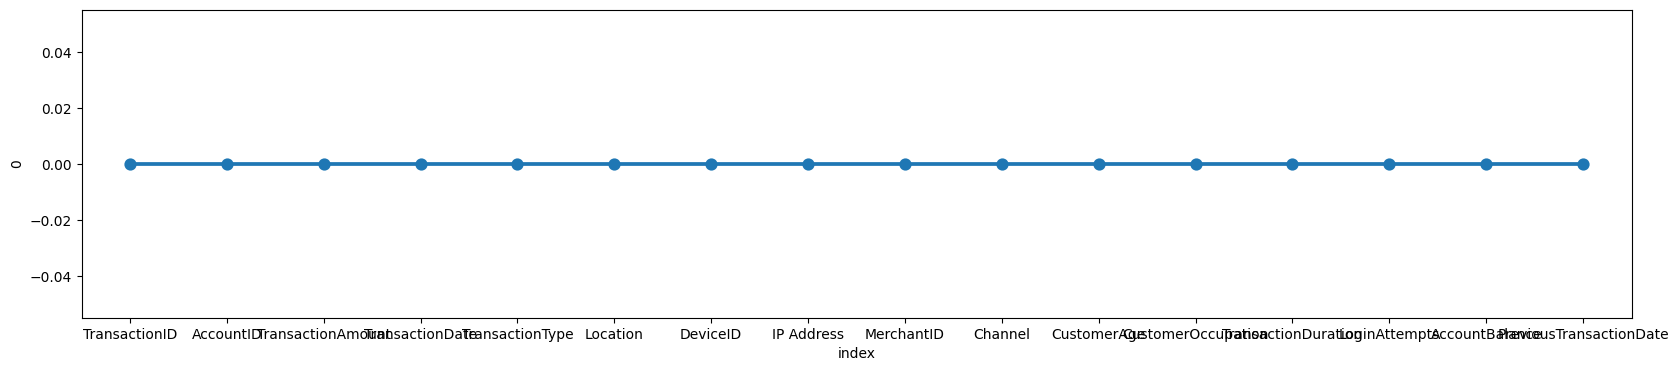

In [14]:
missing = pd.DataFrame(bankdata.isnull().sum() * 100 / len(bankdata)).reset_index()
plt.figure(figsize=(20,4))
sns.pointplot(data=missing, x='index', y=0)

In [17]:
print('Min Age of Cus:', bankdata['CustomerAge'].min())
print('Max Age of Cus:', bankdata['CustomerAge'].max())
print('Min Trans dur by Cus:', bankdata['TransactionDuration'].min())
print('Max Trans dur by Cus:', bankdata['TransactionDuration'].max())

Min Age of Cus: 18
Max Age of Cus: 80
Min Trans dur by Cus: 10
Max Trans dur by Cus: 300


In [23]:
labels = ["{0}-{1}".format(i,i+19) for i in range(0,100,20)]
bankdata['AgeGroup'] = pd.cut(bankdata['CustomerAge'], bins=range(0,101,20), right=False, labels=labels)
bankdata['AgeGroup'].value_counts().sort_index()


AgeGroup
0-19     115
20-39    967
40-59    819
60-79    594
80-99     17
Name: count, dtype: int64